# Given 2 datasets, find which dataset represents linear data and find the equation satisfied by the underlying data

In [ ]:
import tensorflow as tf
import numpy as np

In [3]:
dataset = tf.contrib.learn.datasets.base.load_csv_without_header(
                    filename="ds2.csv",
                    target_dtype=np.float32,
                    features_dtype=np.float32
                )

In [4]:
print(dataset) 
print(np.max(dataset.data)-np.min(dataset.data))
print(np.max(dataset.target)-np.min(dataset.target))

Dataset(data=array([[-194.35032654],
       [ 924.17407227],
       [-241.93574524],
       ..., 
       [ 784.24462891],
       [-214.30223083],
       [ 494.30838013]], dtype=float32), target=array([ -317.83059692,  1695.51330566,  -403.48431396, ...,  1443.64038086,
        -353.74398804,   921.75512695], dtype=float32))
1249.83
2249.7


In [5]:
# Input function to be provided to the estimator
# Data has been normalised

train_input_fn = tf.estimator.inputs.numpy_input_fn(
                    x = {"x": np.array(dataset.data) / (np.max(dataset.data) - np.min(dataset.data))},
                    y = np.array(dataset.target) / (np.max(dataset.target) - np.min(dataset.target)),
                    #x={"x": np.array(dataset.data),
                    #y=np.array(dataset.target)
                    batch_size = 32,
                    shuffle = True
                )

In [7]:
# Defining the feature column

fc = [tf.feature_column.numeric_column("x")]

In [8]:
# Defining the model

model = tf.estimator.LinearRegressor(feature_columns = fc, 
                                     optimizer = tf.train.FtrlOptimizer(learning_rate=0.1,l1_regularization_strength=0.001)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp25ynjzjv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9cee266908>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
# Training the model

trained_model = model.train(input_fn = train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp25ynjzjv/model.ckpt.
INFO:tensorflow:loss = 4.36823, step = 1
INFO:tensorflow:global_step/sec: 580.6
INFO:tensorflow:loss = 0.0145669, step = 101 (0.173 sec)
INFO:tensorflow:global_step/sec: 605.277
INFO:tensorflow:loss = 0.000151921, step = 201 (0.165 sec)
INFO:tensorflow:global_step/sec: 590.035
INFO:tensorflow:loss = 1.43965e-06, step = 301 (0.170 sec)
INFO:tensorflow:Saving checkpoints for 313 into /tmp/tmp25ynjzjv/model.ckpt.
INFO:tensorflow:Loss for final step: 4.61598e-07.


## Finding weight and bias of the linear dataset

In [12]:
# Equation of line => y = wx + b

# Predict for x = 0 => y = b {we get bias}
# Predict for another random point and we get w 
# Denormalise the obtained values because the model is trained on the normalised dataset

new_samples = np.array(
    [[0.7394398216317419]], dtype=np.float32)

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": new_samples},
    num_epochs=1,
    shuffle=False)

predictions = list(trained_model.predict(input_fn=predict_input_fn))
bias = predictions[0]['predictions'][0]
bias

INFO:tensorflow:Restoring parameters from /tmp/tmp25ynjzjv/model.ckpt-313


0.7534312

In [14]:
# Equation of the linear dataset obtained

'''
    1.7970752568397304x + 33.101545871999996
'''

# It is the equation of conversion of celcius to fahrenheit

'\n    1.7970752568397304x + 33.101545871999996\n'

## Visualising the datasets

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
ds1 = pd.read_csv("ds1.csv", header=None)
ds2 = pd.read_csv("ds2.csv", header=None)
ds3 = pd.read_csv("ds3.csv", header=None)

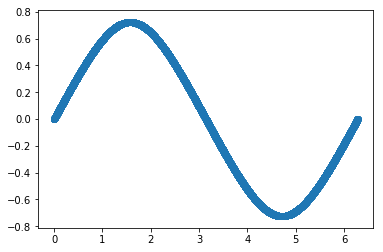

In [80]:
plt.scatter(ds1[0], ds1[1])

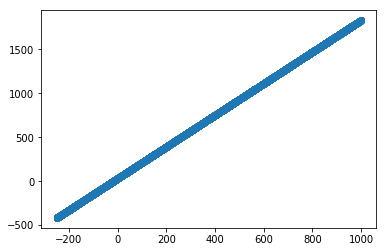

In [81]:
plt.scatter(ds2[0], ds2[1])